This file was used to perform analysis for an elastic bar subject to boundary vibrations

In [1]:
import numpy as np

def A_matrix(n):
    A = np.zeros((n-1, n-1))
    for i in range(0, len(A)):
        for j in range(len(A[i])):
            if j == i - 1:
                A[i][j] = 1
            elif j == i:
                A[i][j] = -2
            elif j == i + 1:
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A



In [2]:
import numpy as np



def g_function(x, t, a, b, T, c_squared):
    
    L = b-a
    amp = 0.05*L

    g_u = np.zeros((len(x)))
    g_u[0] = amp*np.sin(57.17698623*t)
    g_u[len(g_u)-1] = -amp*np.sin(57.17698623*t)

    g_v = np.zeros((len(x)))
    g_v[0] = amp*57.17698623*np.cos(57.17698623*t)
    g_v[len(g_v)-1] = -amp*57.17698623*np.cos(57.17698623*t)

    g = np.concatenate((g_v, g_u), axis=0)

    return g


def ibvp_step(x, state, n, deltat, deltax, tk, a, b, A, I, c_squared, T):
    
    gt_concat = g_function(x, tk, a, b, T, c_squared)
    gt1_concat = g_function(x, tk+deltat, a, b, T, c_squared)

    UL = np.zeros((n-1, n-1))
    UR = I
    LL = c_squared/(deltax**2)*A
    LR = np.zeros((n-1, n-1))

    temp1 = np.concatenate((UL,UR), axis=1)
    temp2 = np.concatenate((LL,LR), axis=1)
    f_matrix = np.concatenate((temp1,temp2), axis=0)

    I_concat = np.identity(2*n-2)

    LHS = I_concat - 1/2*deltat*f_matrix
    RHS = state + (1/2*deltat*((np.matmul(f_matrix, state)) + gt_concat + gt1_concat))

    state_updated = np.linalg.solve(LHS, RHS)
    
    return state_updated
    

def solve_ibvp(state_initial, deltat, deltax, T, a, b, c_squared):
    n = int(abs((b-a)/deltax))
    nt = int(abs(T/deltat))
    x = np.linspace(a+deltax, b-deltax, num=n-1)
    t = np.linspace(0, T, num=nt+1)
    A = A_matrix(n)
    I = np.identity(n-1)
    
    state_hat = [state_initial]
    for h in range(len(t)-1):
        state_updated = ibvp_step(x, state_hat[h], n, deltat, deltax, t[h], a, b, A, I, c_squared, T)
        state_hat.append(state_updated)
    
    state_hat = np.array(state_hat)

    return state_hat, x, t

In [3]:
import numpy as np

a = 0
b = np.pi
L = b-a
c_squared = 68.9e9 / 2710
deltat = 0.0001
deltax = 0.01
T = 1
n = int(abs((b-a)/deltax))
nt = int(abs(T/deltat))
x = np.linspace(a+deltax, b-deltax, num=n-1)

ui = np.zeros((n-1))
vi = np.zeros((n-1))
initial_state = np.concatenate((ui, vi), axis=0)


state_hat, x, t = solve_ibvp(initial_state, deltat, deltax, T, a, b, c_squared)



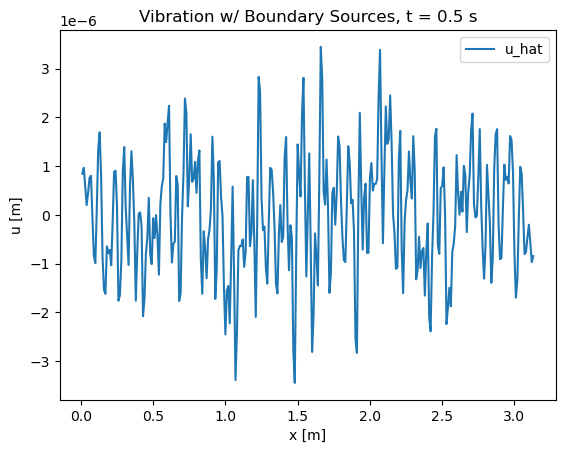

313


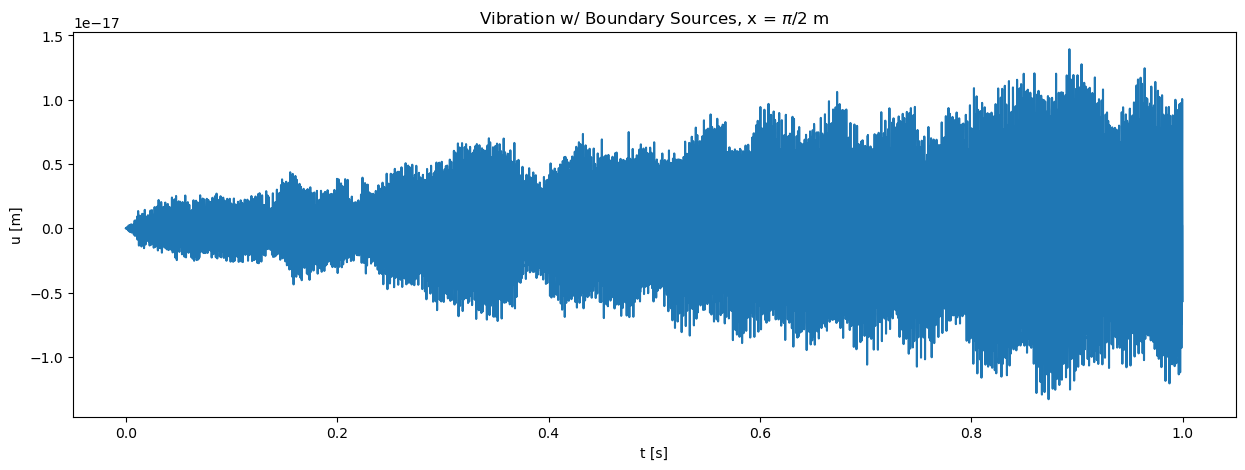

In [20]:
import matplotlib.pyplot as plt
import numpy as np

state_hat_split = np.hsplit(state_hat, 2)

index = 100

uhat = state_hat_split[0]
vhat = state_hat_split[1]


plt.plot(x, state_hat_split[0][index], label='u_hat')
plt.title('Vibration w/ Boundary Sources, t = 0.01 s')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.legend()
plt.savefig('Plots/Vibration/t001.png')
plt.show()

plt.plot(x, state_hat_split[0][1000], label='u_hat')
plt.title('Vibration w/ Boundary Sources, t = 0.1 s')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.legend()
plt.savefig('Plots/Vibration/t01.png')
plt.show()

plt.plot(x, state_hat_split[0][5000], label='u_hat')
plt.title('Vibration w/ Boundary Sources, t = 0.5 s')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.legend()
plt.savefig('Plots/Vibration/t05.png')
plt.show()

plt.plot(x, state_hat_split[0][10000], label='u_hat')
plt.title('Vibration w/ Boundary Sources, t = 1 s')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.legend()
plt.savefig('Plots/Vibration/t1.png')
plt.show()

# print(u_true[500])
# print(t[500])
# print(c_squared)

temp_uhat = np.transpose(uhat)
print(len(temp_uhat))

fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Vibration w/ Boundary Sources, x = $\u03C0$/2 m')
ax.set_xlabel('t [s]')
ax.set_ylabel('u [m]')
ax.plot(t,temp_uhat[156])
plt.savefig('Plots/Vibration/xpi2.png')

#print(uhat)
####
#Approximately 810 Hz

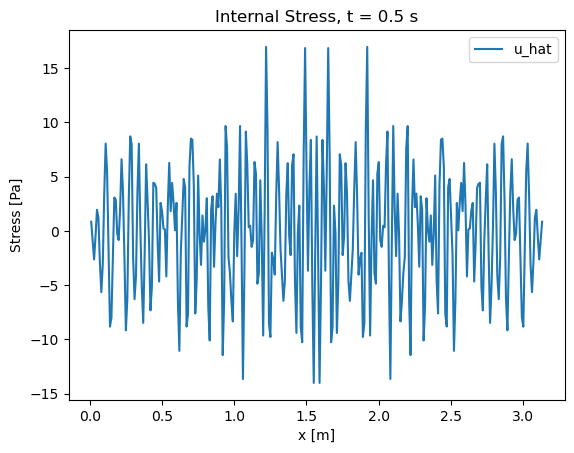

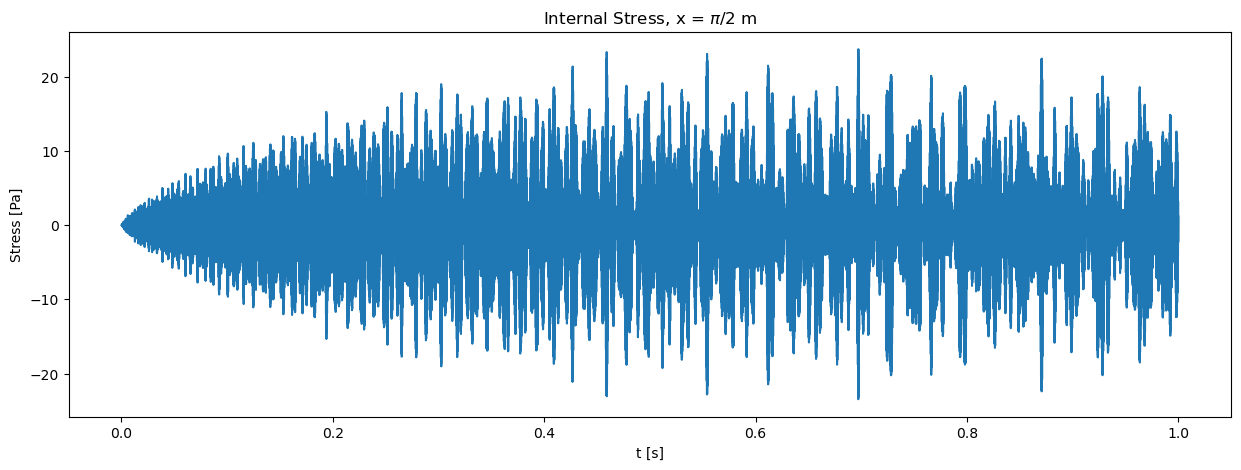

In [23]:
#Stress Analysis

partialx = np.gradient(uhat, axis=1)

Sref = 0.0001
E = 68.9e9

stress = E*Sref*partialx

index = 5000

plt.plot(x, stress[index], label='u_hat')
plt.legend()
plt.title('Internal Stress, t = 0.5 s')
plt.xlabel('x [m]')
plt.ylabel('Stress [Pa]')
plt.savefig('Plots/Vibration/sigma_t05.png')
plt.show()

# print(u_true[500])
# print(t[500])
# print(c_squared)

temp_stress = np.transpose(stress)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Internal Stress, x = $\u03C0$/2 m')
ax.set_xlabel('t [s]')
ax.set_ylabel('Stress [Pa]')
ax.plot(t,temp_stress[156])
plt.savefig('Plots/Vibration/sigma_xpi2.png')